Given three groups of points:
+ Group 1:
    xo=np.array([ [ 2.,  1. ],[ 3. ,  2. ],[ 3.5 , 3. ],[ 4.5 , 2.5],[ 4.7 , 1.5],[ 5. ,  1. ],[ 8. ,  2. ],[ 1. ,  6. ],[ 0.5 , 5.5],[ 0.2 , 7. ],[ 1.5 , 6.8] ])
                 
+ Group 2:
    xb=np.array([ [-1. , -1. ],[-2. , -3. ],[-3.5, -2. ],[-4. , -1.5],[-4.5, -2.5],[-8. , -2. ],[-5,-4],[-5.5,-3],
[-6,-2.5],[-7,-1.8] ])

+ Group 3:
    xg=np.array([ [1.5,-1],[1.8,-2],[2,-2.5],[2.5,-1.8],[3,-2.3],[3.5,-1.9],[4,-2.5],[4.5,-3],[5,-3.4],[5.5,-1.7],[6,-2.3],[7,-3.2] ]) 

Use KNN method with $K=5$ to predict the class labels for all the following testing points:
\begin{align*}
(3*sin(0.4*i), 3*cos(0.4*i)), \quad 0\leq i\leq 19.
\end{align*}

+ Output all the labels of the above 20 points. (You could use (1,0,0),(0,1,0), and (0,0,1) as the labels of these 3 groups.)
+ Plot all the points including the given training points and the 20 testing points in the same figure
    - use marker='+' for the training points and marker='*' for the testing points
    - use color Orange for Group 1 points, color Blue for Group 2 points, and color Green for Group 3 points.
    - Hint: you could use the following command shown in Lecture 11: ax.plot(x1p,x2p,color='orange', marker='+', linestyle='none', linewidth=2, markersize=12)

Please upload two files in the Gdrive folder
+ the pdf file consisting of the codes and all the outputs
+ the .ipynb jupyter notebook file of all your codes.

In [57]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [58]:
xo=np.array([ [ 2., 1. ],[ 3. , 2. ],[ 3.5 , 3. ],[ 4.5 , 2.5],[ 4.7 , 1.5],[ 5. , 1. ],
             [ 8. , 2. ],[ 1. , 6. ],[ 0.5 , 5.5],[ 0.2 , 7. ],[ 1.5 , 6.8] ])
xb=np.array([ [-1. , -1. ],[-2. , -3. ],[-3.5, -2. ],[-4. , -1.5],[-4.5, -2.5],
             [-8. , -2. ],[-5,-4],[-5.5,-3], [-6,-2.5],[-7,-1.8] ])
xg=np.array([ [1.5,-1],[1.8,-2],[2,-2.5],[2.5,-1.8],[3,-2.3],[3.5,-1.9],
             [4,-2.5],[4.5,-3],[5,-3.4],[5.5,-1.7],[6,-2.3],[7,-3.2] ]) 

In [59]:
m = np.shape(xo)[0]
n = np.shape(xb)[0]
q = np.shape(xg)[0]
# Let three group in one matrix
X_traindata = np.block([[xo],[xb],[xg]])

# testdata
I = np.arange(20)
X_testdata = np.array([3*np.sin(0.4*I), 3*np.cos(0.4*I)]).T

# We use KNN with K=5 to find the lable of the testdata
nn = np.shape(X_traindata)[0]
yy = np.zeros([nn,20])
yy_sort = np.zeros([nn,20])
for i in range(20):
    data = X_testdata[i,:] - X_traindata
    yy[:,i] = LA.norm(data, axis = 1)
    yy_sort[:,i] = np.argsort([yy[:,i]])
yy_5sort = yy_sort[0:5,:].T
# then we need to vote
yy_label = np.zeros([20,3])
for i in range(20):
    k1, k2, k3 = 0, 0, 0
    for j in range(5):
        if yy_5sort[i,j] < m: k1 = k1 + 1
        elif yy_5sort[i,j] < m+n: k2 = k2 + 1
        else: k3 = k3 +1
    k = np.argmax([k1,k2,k3])
    # [1,0,0] <------> 1, [0,1,0] <------> 2, [0,0,1] <------> 3   
    if k == 0:
        yy_label[i,:] = [1,0,0]
    elif k == 1:
        yy_label[i,:] = [0,1,0]
    else:
        yy_label[i,:] = [0,0,1]    

In [60]:
print("The label of the test data is, \n", yy_label)

The label of the test data is, 
 [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


we plot the data and our result

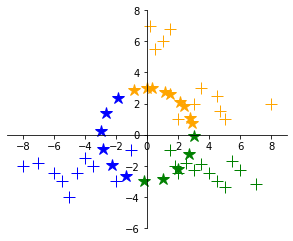

In [61]:
fig,ax=plt.subplots()
ax.plot(xo[:,0],xo[:,1],color='orange', marker='+', linestyle='none', linewidth=2, markersize=12)
ax.plot(xb[:,0],xb[:,1],color='blue', marker='+', linestyle='none', linewidth=2, markersize=12)
ax.plot(xg[:,0],xg[:,1],color='green', marker='+', linestyle='none', linewidth=2, markersize=12)
for i in range(20):
    if (yy_label[i,:] == np.array([1,0,0])).all():
        ax.plot(X_testdata[i,0],X_testdata[i,1],color='orange', marker='*', 
                linestyle='none', linewidth=2, markersize=12)
    elif (yy_label[i,:] == np.array([0,1,0])).all() :
        ax.plot(X_testdata[i,0],X_testdata[i,1],color='blue', marker='*', 
                linestyle='none', linewidth=2, markersize=12)
    else:
        ax.plot(X_testdata[i,0],X_testdata[i,1],color='green', marker='*', 
                linestyle='none', linewidth=2, markersize=12)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.yaxis.tick_left()
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.tick_bottom()
ax.set_aspect('equal')
ax.axis([-9,9,-6,8])
plt.show()

It looks pretty !!!